
# Linear Programming Lab

## Total: 40 points

In this lab, you will explore a useful extension of linear programming duality (covered in class
LP Day 1) called linear programming sensitivity analysis. Here, we aim to find:

- How does the solution change when the objective function changes?
- How does the solution change when the resource limits change?
- How does the solution change when a constraint is added to the problem?

One approach to these types of questions is solving lots of slightly different linear programming problems. This method would work, but it is inelegant and (for large problems) computationally expensive (but in most cases today, computation is cheap and computing solutions to many problems is a standard technique to study sensitivity in practice). However, there is a more elegant solution
that gives these answers just by examining the dual information provided by the Simplex Algorithm.

**Consider the following scenario:** An instrument company makes trombones and trumpets. A trombone requires 40 square inches of metal sheet and a trumpet requires 30 square inches of metal. Metal costs $1 per square inch and 40,000 square inches are available. It takes two hours of skilled labor to make a novice quality trombone or a novice quality trumpet. Three more hours of skilled labor will turn a novice quality trombone into a professional trombone. Two more hours of skilled labor will turn a novice quality trumpet into a professional trumpet. There are 6000 hours of skilled labor available. Assume that you do not need to pay for labor. Assume that you can sell fractional trombones and trumpets. The market selling prices and production costs are given in the following table:

| Product    | Market Price | Cost (metal $1/sq.in.) |
| -------- | ------- | ------- |
| Novice Trombone | $70 | $40 |
| Professional Trombone | $140 | $40 |
| Novice Trumpet | $60 | $30 |
| Professional Trumpet | $110 | $30 |

---


# Problem 1: Formulate the LP (5 points)
## 1a: Set up the LP (3 points)

Write an objective function that maximizes profits (market price - production
costs) and all constraints.

### Instructions
- Write the equations, using LaTeX, between the $$ tags. Then convert the LP problem into code by referring to this documentation: [PuLP Guide](https://realpython.com/linear-programming-python/#using-pulp)

### Solution:
Objective Function: $$ Z = 30x_1 + 100x_2 + 30x_3 + 80x_4 $$
Constraints:
- Metal usage constraint: $$ 40x_1 + 40x_2 + 30x_3 + 30x_4 \le 40000 $$
- Labor usage constraint: $$ 2x_1 + 5x_2 + 2x_3 + 4x_4  \le 6000 $$
- Non-negativity constraint: $$ x_1, x_2, x_3, x_4 \ge 0 $$

In [ ]:
from pulp import LpMaximize, LpProblem, LpVariable, LpStatus, PULP_CBC_CMD
import copy

# Define the problem
main_model = LpProblem(name="instrument-production", sense=LpMaximize) # (please do not rename this variable as it's used later in the notebook)

# Define variables
x1 = LpVariable(name="x1", lowBound=0)  # Novice Trombone
x2 = LpVariable(name="x2", lowBound=0)  # Professional Trombone
x3 = LpVariable(name="x3", lowBound=0)  # Novice Trumpet
x4 = LpVariable(name="x4", lowBound=0)  # Professional Trumpet

# Objective function
main_model += 30 * x1 + 100 * x2 + 30 * x3 + 80 * x4
# Constraints
# 1. Total metal sheet used
main_model += (40 * x1 + 40 * x2 + 30 * x3 + 30 * x4 <= 40000, "Metal_Sheet_Constraint")
# 2. Total skilled labor hours used
main_model += (2 * x1 + 5 * x2 + 2 * x3 + 4 * x4 <= 6000, "labor_usage_constraint")
# 3. Non-negativity constraints (already enforced by lowBound=0 in variable definition)

## 1b) Solve the LP Computationally (1 point)
Use the model we created above to find the optimal profit. Run the code block below to solve the problem.

### Solution:

Optimal Profit: $

In [57]:
# Solve the problem
main_model.solve()

1

## 1c.) What is the optimal number of each instrument to produce? (1 point)
Run the code cell below to find the optimal value for each variable in the model. Fill in the table below.
### Solution:

| Variable    | Value |
| -------- | ------- |
| x1 | 0 |
| x2 | 0 |
| x3 | 0 |
| x4 | 1333 |

In [58]:
for var in main_model.variables():
    print(var.name, var.value())

x1 0.0
x2 0.0
x3 0.0
x4 1333.3333


# Problem 2: Sensitivity of Novice Quality Trumpets (5 points)

## 2a) (2 points)

What would happen if the market price of novice quality trumpets went up? In other words, how much can the market price coefficient in the objective function change without causing the optimal basis to change? This is also called “allowable increase.” You are provided a helper function to find the allowable increase. Try messing with the parameters and looking at the source code in the `helpers.py` file to understand how it works.

### Solution:

The allowable increase for the market price of novice quality trumpets is $50.

This means that the selling price of novice trumpets can increase by up to $50 (from $60 to $110) before the optimal production plan changes. As long as the new price remains below $110, the company should still only produce professional trumpets. However, if the price exceeds $110, it may become profitable to produce novice trumpets as well, and the optimal strategy will change.

In [59]:
from helpers import find_allowable_increase
# Run the helper to find the allowable increase for x3
allowable_increase = find_allowable_increase(base_model=main_model, var_name="x3", base_coef=60, step=5)

print(f"The allowable increase for x3 is: {allowable_increase}")

Iteration 1: Coefficient of x3: 60, Objective value: 106666.664, Solution: {'x1': 0.0, 'x2': 0.0, 'x3': 0.0, 'x4': 1333.3333}
----------------------------------------
Iteration 2: Coefficient of x3: 65, Objective value: 106666.664, Solution: {'x1': 0.0, 'x2': 0.0, 'x3': 0.0, 'x4': 1333.3333}
----------------------------------------
Iteration 3: Coefficient of x3: 70, Objective value: 106666.664, Solution: {'x1': 0.0, 'x2': 0.0, 'x3': 0.0, 'x4': 1333.3333}
----------------------------------------
Iteration 4: Coefficient of x3: 75, Objective value: 106666.664, Solution: {'x1': 0.0, 'x2': 0.0, 'x3': 0.0, 'x4': 1333.3333}
----------------------------------------
Iteration 5: Coefficient of x3: 80, Objective value: 106666.664, Solution: {'x1': 0.0, 'x2': 0.0, 'x3': 0.0, 'x4': 1333.3333}
----------------------------------------
Iteration 6: Coefficient of x3: 85, Objective value: 106666.664, Solution: {'x1': 0.0, 'x2': 0.0, 'x3': 0.0, 'x4': 1333.3333}
---------------------------------------

## 2b) (2 points)
Would novice trumpets be more profitable than professional trumpets to produce if novice trumpets sold for the same amount as professional quality trumpets?

### Solution:
Yes, if novice trumpets sold for $110, they would be more profitable than professional trumpets. The company should only produce novice trumpets because they generate twice the profit per labor hour ($80/2hr vs $80/4hr) while using the same amount of metal.

## 2c) (1 point)
What would change if the price went down?

### Solution:
If the price of novice trumpets went down, at some point, professional trumpets would become the better choice. The break-even price where both are equally good is $70 - below that, it's better to focus on professional trumpets as the profit per hour of labor becomes less for the novice trumpets than that of the professional ones. Metal usage constraint is not a factor here because they both use the same quanity of metal.

# Problem 3: Sensitivity of Novice Quality Trombones (5 points)

## 3a) (2 points)

What would happen if the market price of novice quality trombones went up? In other words, what is the “allowable increase” in the market price of novice quality trombones?


### Solution:
The allowable increase for the market price of novice quality trombones is $77.

This means that the selling price of novice quality trombones can increase by up to $77 (from $70 to $147) before the optimal production plan changes. As long as the new price remains below $110, the company should still only produce professional quality trombones. However, if the price exceeds $110, it may become profitable to produce novice quality trombones as well, and the optimal strategy will change.

In [60]:
from helpers import find_allowable_increase

# setting verbose to False since we take smaller steps for this variable and don't want to print every iteration
allowable_increase = find_allowable_increase(base_model=main_model, var_name="x1", base_coef=70, step=1, max_iter=100, verbose=False)

print(f"The allowable increase for x1 is: {allowable_increase}")

Optimal basis changed at coefficient 147.

The allowable increase for x1 is: 77


## 3b) (3 points)
Would they be profitable to produce if they sold for the same amount as professional quality trombones? What would make them profitable to produce (intuitive explanation is expected, not specific numbers)?

### Solution:

Since the optimal basis changes at the unit price of $147 per novice quality trombone, which is greater than the $140 per professional quality trombone, it would not be more profitable if they were sold for the same amount. Selling the novice quality trombones at or above $147 per piece would make them profitable to produce.

# Problem 4: Sensitivity of Professional Quality Trumpets (2 points)

What would happen to the optimal solution if the price of professional quality trumpets fell to $100? If there is a change, what would the new production plan and optimal profit be?

Provide your analysis and corresponding code below.

### Solution:

With the price of professional trumpets reduced to $100, the optimal production plan focuses entirely on producing professional trombones, yielding a profit of $100,000. No novice trombones or trumpets and professional trumpets are produced due to the relative drop in profits from professional trumpets compared to professional trombones.


In [ ]:
low_trumpet_model = LpProblem(name="instrument-production", sense=LpMaximize)

# Define variables
x1 = LpVariable(name="x1", lowBound=0)  # Novice Trombone
x2 = LpVariable(name="x2", lowBound=0)  # Professional Trombone
x3 = LpVariable(name="x3", lowBound=0)  # Novice Trumpet
x4 = LpVariable(name="x4", lowBound=0)  # Professional Trumpet

# Re-define Objective function
low_trumpet_model += 30 * x1 + 100 * x2 + 30 * x3 + 70 * x4

# Constraints
low_trumpet_model += 40 * x1 + 40 * x2 + 30 * x3 + 30 * x4 <= 40000, "Metal Sheet Constraint"
low_trumpet_model += 2 * x1 + 5 * x2 + 2 * x3 + 4 * x4 <= 6000, "Skilled Labor Constraint"

# Solve the low_trumpet_model
low_trumpet_model.solve(PULP_CBC_CMD(msg=0))

# Display results
print("Sensitivity Analysis for Professional Quality Trumpets (Price = $100):")
print(f"Objective value (Profit): {low_trumpet_model.objective.value()}")
for var in low_trumpet_model.variables():
    print(f"{var.name}: {var.value()}")

Sensitivity Analysis for Professional Quality Trumpets (Price = $100):
Objective value (Profit): 100000.0
x1: 0.0
x2: 1000.0
x3: 0.0
x4: 0.0


# Problem 5: Sensitivity of Metal Resources (8 points)

## 5a) (4 points)
How do production plans change when metal supplies change? At which point does metal stop being a limiting resource and how do you know?

**HINT**: To find out how the production plans change when metal supplies change, you can use a **guess-and-check approach**. 

1. Start with the current RHS of the "Metal Sheet Constraint" (40,000 square inches).
2. Gradually increase or decrease the RHS (e.g., by 1,000 or 5,000 units at a time).
3. For each adjustment:
   - Re-run to solve the problem and record the production plan (values of x_1, x_2, x_3, x_4) and the total profit.
   - Compare the new solution to the original solution (at RHS = 40,000).
4. Stop increasing when you notice the production plan has stopped changing. The last RHS value before the variable values stop changing is the **RHS Tolerance Upper Bound**.
5. Stop decreasing when the model becomes infeasible. The last RHS value before the model becomes infeasible is the **RHS Tolerance Lower Bound**.

### Solution:

Following the steps listed in the HINT above, the RHS Tolerance Upper Bound for the metal constraint is approximately 45000 square inches with an optimal profit of $120000 after selling 1500 professional quality trumpets. The RHS Tolerance Lower Bound would be 0 square inches of metal since the solution is infeasible.

In [ ]:
rhs_tol_model = copy.deepcopy(main_model)

# Print the results
print("Initial Solution:")
print(f"Total Profit: ${rhs_tol_model.objective.value():.2f}")
print("Production Plan:")
for var in rhs_tol_model.variables():
    print(f"  {var.name}: {var.varValue}")

# Check slack for each constraint
print("\nSlack Values for Constraints:")
for name, constraint in rhs_tol_model.constraints.items():
    print(f"  {name}: RHS = {constraint.constant}, slack = {constraint.slack}")

# ---------------------------------------------
# Guess-and-Check Setup
# ---------------------------------------------
# Change the RHS of the "Metal Sheet Constraint" below and re-run this block of code.
rhs_tol_model.constraints["Metal_Sheet_Constraint"].changeRHS(45000)

print("---------------------------------------------")
print("After Adjusting Metal Sheet Constraint:")

# Re-solve the problem
rhs_tol_model.solve(PULP_CBC_CMD(msg=0))
print(f"Model Solution Status: {LpStatus[rhs_tol_model.status]}")

# Print updated results
print(f"Total Profit: ${rhs_tol_model.objective.value():.2f}")
print("Production Plan:")
for var in rhs_tol_model.variables():
    print(f"  {var.name}: {var.varValue}")

# Check slack for each constraint
print("\nSlack Values for Constraints:")
for name, constraint in rhs_tol_model.constraints.items():
    print(f"  {name}: RHS = {constraint.constant}, slack = {constraint.slack}")

Initial Solution:
Total Profit: $106666.66
Production Plan:
  x1: 0.0
  x2: 0.0
  x3: 0.0
  x4: 1333.3333

Slack Values for Constraints:
  Metal_Sheet_Constraint: RHS = -40000, slack = -0.0
  labor_usage_constraint: RHS = -6000, slack = 666.6666999999998
---------------------------------------------
After Adjusting Metal Sheet Constraint:
Model Solution Status: Optimal
Total Profit: $120000.00
Production Plan:
  x1: 0.0
  x2: 0.0
  x3: 0.0
  x4: 1500.0

Slack Values for Constraints:
  Metal_Sheet_Constraint: RHS = -45000, slack = -0.0
  labor_usage_constraint: RHS = -6000, slack = -0.0


## 5b) (4 points)
**What is the shadow price of metal?**  
1. Explain the concept of a shadow price in the context of the "Metal Sheet Constraint" and how it impacts the objective function (profit).  
2. Using the shadow price, calculate how much the profit is expected to change if the metal supplies increase by 500 square inches.  
3. Solve the problem again with the increased metal supplies and verify the expected profit change and the new production plan.

Use the following formula for profit change:  
$$ \Delta profit = \Delta \text{metal supplies quantity} \cdot dual_{metal} $$

---

### HINT

1. **What is the Shadow Price?**  
   The shadow price (also called the dual value) of a constraint tells you how much the objective value (profit) will change per unit increase in the RHS of the constraint, as long as the change is within the **RHS tolerance interval**.

2. **How to Find the Shadow Price?**  
   - Solve the LP model with the original RHS.
   - Check the **dual value** (`constraint.pi`) of the "Metal Sheet Constraint" in the solver's output. This is the shadow price.

3. **Useful Methods**
   - Use `shadow_model.constraints["Metal_Sheet_Constraint"].changeRHS(new_rhs)` to update the RHS of the "Metal Sheet Constraint"

### Solution:

1. The shadow price is the rate of change in the objective function (profit, in this case) when the right-hand side (RHS) of a constraint is increased by one unit, while keeping all other factors constant. In the context of the metal sheet constraint, the shadow price tells us how much the profit would increase if the available metal were increased by one additional unit of metal (1 square inch).
If the shadow price is positive, it means that the metal constraint is binding, and adding more metal will lead to an increase in profit because we can produce more products. If the shadow price is zero, it indicates that the metal constraint is not binding, i.e., there is unused metal capacity, and increasing the metal supply would not change the optimal production plan or profit.
2. Using the shadow price of 2.67, the profit increase when the metal quantity increased by 500 square units is $1333.33.
3. Solving the problem again with the increased metal supply, the new profit is $108000 which is $1333.33 more the $106666 when the metal quantity was 40000 square inches. This verifies the expected profit change calculated using the shadow price. 

In [316]:
shadow_model = copy.deepcopy(main_model)

# Solve the shadow price problem
dual_metal = shadow_model.constraints["Metal_Sheet_Constraint"].pi
print(f"Shadow Price of Metal = {dual_metal}")

delta_metal_quat = 500
delta_profit = delta_metal_quat * dual_metal
print(f"Change in profit with Increased Metal Quantity (+{delta_metal_quat} square inches): ${delta_profit}")

# Update RHS
shadow_model.constraints["Metal_Sheet_Constraint"].changeRHS(40500)

# Re-solve the problem
shadow_model.solve(PULP_CBC_CMD(msg=0))
print(f"Model Solution Status: {LpStatus[shadow_model.status]}")

# Display the new results
print("\nNew Results with Increased Metal Supply:")
print(f"New Profit: {shadow_model.objective.value()}")
print("Production Plan:")
for var in shadow_model.variables():
    print(f"  {var.name}: {var.value()}")

Shadow Price of Metal = 2.6666667
Change in profit with Increased Metal Quantity (+500 square inches): $1333.3333499999999
Model Solution Status: Optimal

New Results with Increased Metal Supply:
New Profit: 108000.0
Production Plan:
  x1: 0.0
  x2: 0.0
  x3: 0.0
  x4: 1350.0


# Problem 6: Sensitivity of Labor Resources (5 points)

## 6a) (1 point)
How much labor is unused?

HINT: What is the slack?

### Solution
The labor slack is 666.66 hours.

In [ ]:
labor_stack_model = copy.deepcopy(main_model)

# Print the results
print("Solution:")
print(f"Total Profit: ${labor_stack_model.objective.value():.2f}")
print("Production Plan:")
for var in labor_stack_model.variables():
    print(f"  {var.name}: {var.varValue}")

# Check slack for each constraint
print("\nSlack Values for Constraints:")
slack_labor = labor_stack_model.constraints["labor_usage_constraint"].slack
print(f"Unused Labor Hours = {slack_labor}")

dual_labor = labor_stack_model.constraints["labor_usage_constraint"].pi
print(f"Shadow Price of Labor = {dual_labor}")

Solution:
Total Profit: $106666.66
Production Plan:
  x1: 0.0
  x2: 0.0
  x3: 0.0
  x4: 1333.3333

Slack Values for Constraints:
Unused Labor Hours = 666.6666999999998
Shadow Price of Labor = -0.0


## 6b) (2 points)
How much would you be willing to pay an additional laborer?

### Solution:
Since the shadow price is zero, the labor constraint is not binding, meaning there is unused labor capacity, and paying for additional labor would not increase the profit. I would not be willing to pay for an additional laborer as it will have no effect on the profit.

## 6c) (2 points)
Suppose that industrial regulation complicate the process so it takes an additional hour of labor to turn a novice quality instrument into a professional quality instrument. How and why does that change affect the optimal production plan and profit?

### Solution:

The new industrial regulation that adds 1 hour of labor to upgrade novice instruments to professional quality will shift the optimal production plan and reduce profit. With the increased labor requirement for upgrades, the model is likely to produce more novice instruments (which require less labor) and fewer professional instruments, as labor is a limiting resource. Since novice instruments have lower profit margins than professional instruments, this shift will result in a decrease in total profit.

# Problem 7: Sensitivity of New Constraint (5 points)

## 7a) (4 points)
The owner of the company comes up with a design for a beautiful hand-crafted tuba. Each tuba requires 250 hours of labor (6.25 weeks of full time work) and uses 50 square inches of metal. If the
company can sell tubas for $200, would it be worthwhile to produce? Use:
$$ \text{(marginal cost of metal)}_{tuba} = \text{(metal used)}_{tuba} \cdot dual_{metal} $$

Discuss how looking at the shadow prices of metal and labor can help
you intuit whether diverting metal resources to tuba production is a good idea. Check your intuition with the solver.

### Solution:

Looking at the shadow prices of metal and labor helps determine whether diverting resources to tuba production is a good idea. A high shadow price for metal means each additional square inch is valuable, making tubas less attractive if metal is scarce. A low shadow price for labor suggests that adding labor-intensive products (like tubas) may be feasible without significantly affecting profitability.
The tuba could be profitable under current constraints, as it has a positive margin of $49.99 determined through the shadow prices below. However, its high labor demand could make it less attractive if labor becomes more constrained. The profits are also heavily impacted by the quantity of metal available as metal has a high shadow price, which puts profiting at risk if metal is scarce.

In [424]:
from pulp import LpMaximize, LpProblem, LpVariable, value

# Define the problem
tuba_model = LpProblem(name="instrument-production", sense=LpMaximize)

# Define variables
x1 = LpVariable(name="x1", lowBound=0)  # Novice Trombone
x2 = LpVariable(name="x2", lowBound=0)  # Professional Trombone
x3 = LpVariable(name="x3", lowBound=0)  # Novice Trumpet
x4 = LpVariable(name="x4", lowBound=0)  # Professional Trumpet
x5 = LpVariable(name="x5", lowBound=0)  # Tubas

# Define the problem and analyze the shadow prices
# Objective function
tuba_model += 30 * x1 + 100 * x2 + 30 * x3 + 80 * x4 + 150 * x5
# Constraints
# 1. Total metal sheet used
tuba_model += (40 * x1 + 40 * x2 + 30 * x3 + 30 * x4 + 50 * x5 <= 40000, "Metal_Sheet_Constraint")
# 2. Total skilled labor hours used
tuba_model += (2 * x1 + 5 * x2 + 2 * x3 + 4 * x4 + 250 * x5 <= 6000, "labor_usage_constraint")
# 3. Non-negativity constraints (already enforced by lowBound=0 in variable definition)

# Solve the model
tuba_model.solve()
print(f"Model Solution Status: {LpStatus[tuba_model.status]}")

# Display the new results
print("\nNew Results:")
print(f"New Profit: {tuba_model.objective.value()}")

var_values = {}
print("Production Plan:")
for var in tuba_model.variables():
    print(f"  {var.name}: {var.value()}")
    var_values[var.name] = (var.value())

# Check slack for each constraint
shadow_price = {}
print("\nShadow Price for Constraints:")
for name, constraint in tuba_model.constraints.items():
    print(f"  {name}: Shadow Price = {constraint.pi}")
    shadow_price[name] = (constraint.pi)

# Extract the variable of interest
metal_used_tuba = var_values['x5'] * 50
labor_used_tuba = var_values['x5'] * 250
marginal_cost_metal_tuba = 50 * shadow_price['Metal_Sheet_Constraint']
marginal_cost_labor_tuba = 250 * shadow_price['labor_usage_constraint']
total_effective_cost_tuba = marginal_cost_metal_tuba + marginal_cost_labor_tuba
effective_profit_tuba = 200 - total_effective_cost_tuba
print(f"\nMarginal Cost of Metal for Tuba = ${marginal_cost_metal_tuba}\n"
        f"Marginal Cost of Labor for Tuba = ${marginal_cost_labor_tuba}\n"
        f"Total Effective Cost for Tuba = ${total_effective_cost}\n"
        f"Effective Profit for Tuba = ${effective_profit_tuba}")


Model Solution Status: Optimal

New Results:
New Profit: 106712.3269
Production Plan:
  x1: 0.0
  x2: 0.0
  x3: 0.0
  x4: 1328.7671
  x5: 2.739726

Shadow Price for Constraints:
  Metal_Sheet_Constraint: Shadow Price = 2.6575342
  labor_usage_constraint: Shadow Price = 0.068493151

Marginal Cost of Metal for Tuba = $132.87671
Marginal Cost of Labor for Tuba = $17.12328775
Total Effective Cost for Tuba = $149.99999775
Effective Profit for Tuba = $50.000002249999994


## 7b) (1 point)
Is it profitable if tubas sell for $150? Why?

### Solution:

It is not profitable to sell the tubas for $150 because the model would go back to selling only professional quality trumpets as they have a higher profit margin, both due to using less metal and labor hours than tubas.

# Problem 8: Making Sense of the Dual Problem (5 points)

## 8a) (3 points)
Set up the original problem’s corresponding dual LP. Write an objective function that maximizes profits (market price - production costs) and all dual constraints.

In [427]:
from pulp import LpMinimize, LpProblem, LpVariable

# Define the dual problem
dual_model = LpProblem(name="dual-instrument-production", sense=LpMinimize)

# Define the dual problem
# Define variables
y1 = LpVariable(name="y1", lowBound=0)  # Shadow Price of Metal per square inch
y2 = LpVariable(name="y2", lowBound=0)  # Shadow Price of Labor per hour

# Define the problem and analyze the shadow prices
# Objective function
dual_model += 40000 * y1 + 6000 * y2
# Constraints
# 1. Novice Quality Trombone
dual_model += (40 * y1 + 2 * y2 >= 30, "novice_trombone_constraint")
# 2. Professional Quality Trombone
dual_model += (40 * y1 + 5 * y2 >= 100, "professional_trombone_constraint")
# 3. Novice Quality Trumpet
dual_model += (30 * y1 + 2 * y2 >= 30, "novice_trumpet_constraint")
# 4. Professional Quality Trumpet
dual_model += (30 * y1 + 4 * y2 >= 80, "professional_trumpet_constraint")
# 5. Non-negativity constraints (already enforced by lowBound=0 in variable definition)

# Solve the model
dual_model.solve()
print(f"Model Solution Status: {LpStatus[dual_model.status]}")

# Display the new results
print("\nDual Model Results:")
print(f"New Profit: {dual_model.objective.value()}")

var_values = {}
print("Production Plan:")
for var in dual_model.variables():
    print(f"  {var.name}: {var.value()}")
    var_values[var.name] = (var.value())

# Check slack for each constraint
shadow_price = {}
print("\nShadow Price for Constraints:")
for name, constraint in dual_model.constraints.items():
    print(f"  {name}: Shadow Price = {constraint.pi}")
    shadow_price[name] = (constraint.pi)


Model Solution Status: Optimal

Dual Model Results:
New Profit: 106666.66799999999
Production Plan:
  y1: 2.6666667
  y2: 0.0

Shadow Price for Constraints:
  novice_trombone_constraint: Shadow Price = 0.0
  professional_trombone_constraint: Shadow Price = 0.0
  novice_trumpet_constraint: Shadow Price = 0.0
  professional_trumpet_constraint: Shadow Price = 1333.3333


## 8b) (1 point)
Run the code block below to solve the problem. What is the optimal profit? Give a plot of the constraints (you can use this [example](https://github.com/hakeemrehman/Python-PuLP-/blob/master/LP%20Using%20PuLP%20and%20Graphical%20Sol..ipynb) for guidance).

Dual Problem Results:
Optimal Value (Total Resource Value): 106666.66799999999


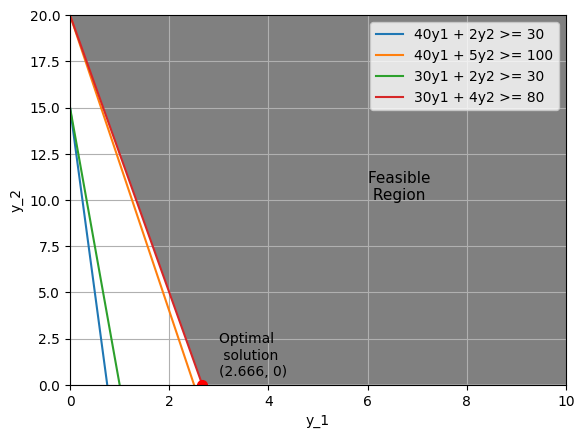

In [473]:
from pulp import *
import matplotlib.pyplot as plt
import numpy as np

# Solve the dual problem
dual_model.solve(PULP_CBC_CMD(msg=0))

# Display the results
print("Dual Problem Results:")
print(f"Optimal Value (Total Resource Value): {dual_model.objective.value()}")

# Optimal Solution Plot
x = np.arange(0, 10)
plt.plot(x, (30 - 40*x)/2, label = '40y1 + 2y2 >= 30')
plt.plot(x, (100 - 40*x)/5, label= '40y1 + 5y2 >= 100')
plt.plot(x, (30 - 30*x)/2, label = '30y1 + 2y2 >= 30')
plt.plot(x, (80 - 30*x)/4, label = '30y1 + 4y2 >= 80')

# Define the boundaries of the feasible area in the plot
x = [0, 2.66, 10, 10]
y = [20, 0, 0, 20]
plt.fill(x, y, 'grey')
plt.axis([0, 10, 0, 20])
plt.xlabel("y_1")
plt.ylabel("y_2")
plt.text(6, 10, 'Feasible \n Region', size = '11')
plt.plot(2.666, 0, 'ro', markersize = 7)
plt.annotate('Optimal \n solution\n(2.666, 0)', xy = (3, 0.5))
plt.grid(True)
plt.legend()
plt.show()


## 8c) (1 point)
Say something about the relationship between dual variables and slackness in the primal and dual problem.

### Solution:

The dual variables are the shadow variables from the primal problem. They function to minimize the slackness in the primal problem to reach an optimal solution.